In [4]:
import pandas as pd

df= pd.read_csv("books_dataset.csv")

columns_of_interest= df[["pages","numRatings","genres"]]

initial_row_count = len(df)
cleaned_data= columns_of_interest.dropna()      # get rid of nulls, NaN, etc

cleaned_data["pages"]= pd.to_numeric(cleaned_data["pages"],errors="coerce")
cleaned_data["numRatings"]= pd.to_numeric(cleaned_data["numRatings"],errors="coerce")

# filter out the outliers
filtered_data = cleaned_data[(cleaned_data["pages"] >= 20) & 
                             (cleaned_data["pages"] <= 1200) & 
                             (cleaned_data["numRatings"] <= 2000000)]

deleted_row_count= initial_row_count - len(filtered_data)
print(f"Number of deleted rows: {deleted_row_count}")

print (cleaned_data); 

Number of deleted rows: 3235
       pages  numRatings                                             genres
0      374.0     6376780  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...
1      870.0     2507623  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...
2      324.0     4501075  ['Classics', 'Fiction', 'Historical Fiction', ...
3      279.0     2998241  ['Classics', 'Fiction', 'Romance', 'Historical...
4      501.0     4964519  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...
...      ...         ...                                                ...
52473    0.0         871  ['Vampires', 'Paranormal', 'Young Adult', 'Rom...
52474  190.0          37                         ['Mystery', 'Young Adult']
52475  280.0        6674  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...
52476  507.0         238  ['Fiction', 'Mystery', 'Historical Fiction', '...
52477  201.0         246  ['Lds Fiction', 'Historical Fiction', 'Young A...

[50131 rows x 3 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_11184\2309819056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["pages"]= pd.to_numeric(cleaned_data["pages"],errors="coerce")
C:\Users\user\AppData\Local\Temp\ipykernel_11184\2309819056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["numRatings"]= pd.to_numeric(cleaned_data["numRatings"],errors="coerce")


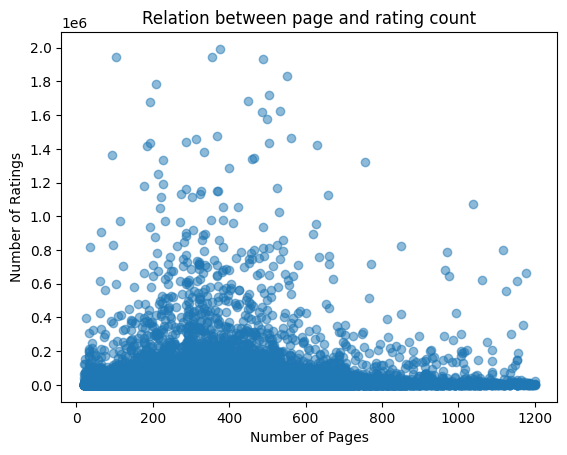

In [5]:
import matplotlib.pyplot as plt

plt.scatter(filtered_data["pages"],filtered_data["numRatings"],alpha=0.5)
plt.xlabel("Number of Pages")
plt.ylabel("Number of Ratings")
plt.title("Relation between page and rating count")

plt.xticks(ticks= range(0, int(filtered_data["pages"].max()) + 200, 200))
plt.yticks(ticks= range(0, int(filtered_data["numRatings"].max()) + 200000, 200000))
plt.show()

In [6]:
correlation= filtered_data["pages"].corr(filtered_data["numRatings"])
print("Correlation between pages and number of ratings: ", correlation)     # very low corelation, as expected

Correlation between pages and number of ratings:  0.07286362195851913


In [7]:
import numpy as np

filtered_data["genres"] = filtered_data["genres"].apply(lambda x: eval(x))
exploded_data = filtered_data.explode("genres")  # explode, so every genre has its own row

top_genres = exploded_data.groupby("genres")["numRatings"].sum().nlargest(10).index
top_genres_data = exploded_data[exploded_data["genres"].isin(top_genres)]

genre_stats = top_genres_data.groupby("genres")["pages"].mean().reset_index()   # get the average pages per genre
print(genre_stats)


C:\Users\user\AppData\Local\Temp\ipykernel_11184\3429670063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["genres"] = filtered_data["genres"].apply(lambda x: eval(x))


         genres       pages
0         Adult  354.901892
1     Adventure  355.564719
2     Audiobook  367.094190
3      Classics  305.098549
4  Contemporary  322.341736
5       Fantasy  340.793868
6       Fiction  335.318294
7        Novels  351.836163
8       Romance  339.567170
9   Young Adult  309.511810


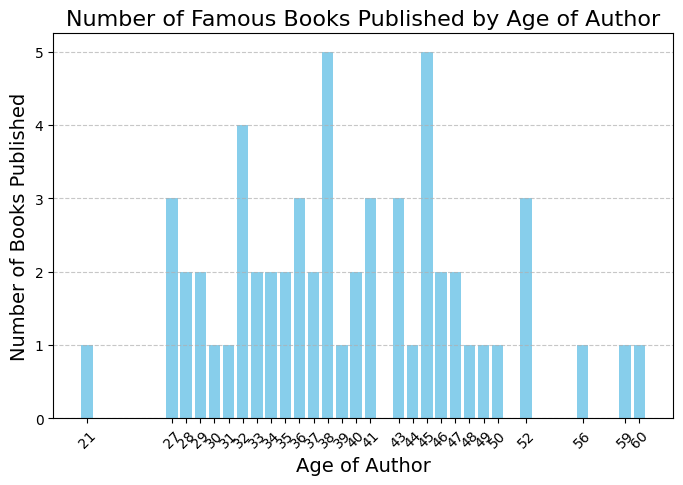

In [8]:
import matplotlib.pyplot as plt
import re
from collections import defaultdict

file_path = 'authors_age.txt'  
with open(file_path, 'r') as file:
    data = file.readlines()

age_pattern = re.compile(r"(\d{2,}) years? old")
book_counts = defaultdict(int)

current_age = None
for line in data:
    age_match = age_pattern.search(line)
    if age_match:
        current_age = int(age_match.group(1))
    elif current_age is not None:
        if line.strip() != "": 
            book_counts[current_age] += 1

ages = sorted(book_counts.keys())
counts = [book_counts[age] for age in ages]

plt.figure(figsize=(8, 5))
plt.bar(ages, counts, color='skyblue')

plt.title("Number of Famous Books Published by Age of Author", fontsize=16)
plt.xlabel("Age of Author", fontsize=14)
plt.ylabel("Number of Books Published", fontsize=14)
plt.xticks(ages, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
# Data is small and scattered, but proves that there's no exact age to write a good book. Though, prime age range for writing would be 30-50.